In [237]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [238]:
data_train_orig = np.loadtxt('data/u1.base',dtype = np.int64)
data_test_orig = np.loadtxt('data/u1.test',dtype=np.int64)

data_train_orig[:,0]-=1
data_train_orig[:,1]-=1
data_test_orig[:,0]-=1
data_test_orig[:,1]-=1


n_users = 943
n_items = 1682
print(n_users,n_items)

R = np.zeros((n_users,n_items))
for i in range(data_train_orig.shape[0]):
    R[data_train_orig[i][0]][data_train_orig[i][1]]=data_train_orig[i][2]


943 1682


In [239]:
K = 2
P = np.random.rand(n_users,K)
Q = np.random.rand(n_items,K)

In [240]:
def validation_loss(P,Q, lambda_p = 0.02, lambda_q = 0.02):
    R_val = np.zeros((n_users,n_items))
    for i in range(data_test_orig.shape[0]):
        R_val[data_test_orig[i][0]][data_test_orig[i][1]]=data_test_orig[i][2]
        
    n_pu = np.sum(R_val>0,axis = 1)
    n_qi = np.sum(R_val>0,axis = 0)
    loss = np.sum(np.square(R_val - np.dot(P,Q.T))) \
                + lambda_p * np.sum(n_pu * np.sum(np.square(P), axis=1)) \
                + lambda_q * np.sum(n_qi * np.sum(np.square(Q), axis=1))
    return loss
    

In [270]:
def train(P,Q,R,learning_rate = 0.01, lambda_p = 30, lambda_q = 30, max_iterations = 5000):
    
    P = np.random.rand(n_users,K)
    Q = np.random.rand(n_items,K)

    val_loss_log = []
    
    for it in range(max_iterations):
        idx = np.random.randint(data_train_orig.shape[0])
#         idx = it%n_users
        u = data_train_orig[it][0]
        i = data_train_orig[it][1]
        r = data_train_orig[it][2]
        assert R[u,i]==r
        E = r - np.dot(P[u],Q[i])
        
        loss = np.square(r-np.dot(P[u],Q[i])) + lambda_p * np.sum(np.square(P[u])) + lambda_q * np.sum(np.square(Q[i]))
        
        val_loss = validation_loss(P,Q)
        val_loss_log.append(val_loss)
        
        if it % 50 ==0:
            print(it,loss,val_loss)
#         break
        gp = E*(-Q[i])+lambda_p*P[u]
        gq = E*(-P[u])+lambda_q*Q[i]

#         print(P.shape,gp.shape,Q.shape,gq.shape)
#         print(E)
#         print(gp.shape)
#         P = P + learning_rate * gp
#         Q = Q + learning_rate * gq
        P[u] = P[u] - learning_rate * gp
        Q[i] = Q[i] - learning_rate * gq
        
    return val_loss_log
        

0 83.3626066272 752353.385538
50 49.9802500191 740114.924932
100 25.7380160604 731937.754441
150 44.2065662377 724604.898905
200 25.2952723406 715255.014425
250 5.54990484095 709195.058188
300 49.967271954 698883.117063
350 4.01267455793 694707.874507
400 32.9759233508 688769.559827
450 25.3925324392 681277.116217
500 31.9026267411 678036.342492
550 51.6279128554 672147.806261
600 51.0476029199 659059.098799
650 9.15093418543 650803.465051
700 25.2896826248 646639.598484
750 16.2691207692 643825.531156
800 9.27551997129 638890.160456
850 16.5090908594 636459.920686
900 4.39827006559 632372.509742
950 19.4935828458 630447.512708
1000 9.06089924029 628984.86635
1050 9.00205856838 625553.059221
1100 29.6070874695 623579.105035
1150 25.2741298786 618119.077247
1200 18.9045112666 605016.773653
1250 49.6640532364 588553.839043
1300 16.3153914502 580311.204254
1350 9.19639305939 577686.419704
1400 25.0001163781 574468.120233
1450 16.0000796765 570496.173938
1500 9.0006021753 569010.943562
155

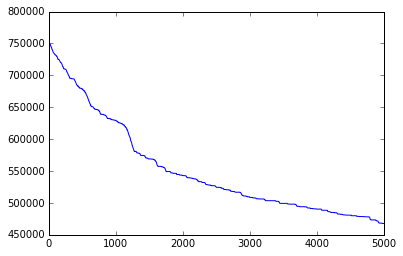

In [271]:
val_loss = train(P,Q,R,learning_rate=0.03)

plt.plot(val_loss)
plt.show()

In [243]:
# K = 10
# # P = np.zeros((n_users,K))
# # Q = np.zeros((n_items,K))
# P = np.random.rand(n_users,K)
# Q = np.random.rand(n_items,K)
# lambd = 0.01

In [244]:
# def compute_cost(P,Q,R):
#     cost = np.sum(np.square(R-np.dot(P,Q.T))) + lambd * (np.sum(np.sum(R>0,axis=1) * np.sum(np.square(P),axis=1)) + np.sum(np.sum(R>0,axis=0) * np.sum(np.square(Q),axis=1)))
#     return cost

In [245]:
# def validation(P,Q,test_data):
#     R = np.dot(P,Q.T)
#     m = test_data.shape[0]
#     MAE = 0
#     for i in range(m):
#         MAE += abs(R[test_data[i][0]][test_data[i][1]]-test_data[i][2])
#     MAE/=m
    
# #     print('MAE: %f' % MAE)
# #     print(R[test_data[i][0]-1][test_data[i][1]-1],test_data[i][2])
#     return MAE    

In [246]:

# def optimize(P,Q):
#     for loop in range(1000):
#         for u in range(n_users):
#             select = R[u,:]>0
#             x = np.linalg.pinv(np.dot(Q[select].T,Q[select])+lambd*np.sum(R[u]>0)*np.eye(K))
#             P[u] = np.dot(np.dot(x,Q.T),R[u].T)
#         for i in range(n_items):
#             select = R[:,i]>0
#             x = np.linalg.pinv(np.dot(P[select].T,P[select]) +lambd*np.sum(R[:,i]>0)*np.eye(K))
#             Q[i] = np.dot(np.dot(x,P.T),R[:,i])
#         cost = compute_cost(P,Q,R)
#         print(cost,validation(P,Q,data_test_orig))

In [247]:
# optimize(P,Q)

In [248]:

#     R[test_data[:,0]][test]

In [249]:
# validation(P,Q,data_test_orig)

In [250]:
x = np.array([[1,2],[3,4]])
np.sum(x,axis = 1)

array([3, 7])